### Data Exploration and Analysis Notebook

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt
from IPython.display import display, HTML

graph_directory = "..\\graphs\\eda\\"

In [2]:
# Import dataset and print out basic data

df = pd.read_csv("..\\data\\unclean\\car_dataset.csv", delimiter = ";")

print(df.describe(include='all'))
print(f"\nTotal Rows: {len(df)}")
print(f"\n{df.head(7)}")

       buying maintenance doors persons luggage_boot safety class_values
count    1728        1728  1728    1728         1728   1728         1728
unique      4           4     4       3            3      3            4
top     vhigh       vhigh     2       2        small    low        unacc
freq      432         432   432     576          576    576         1210

Total Rows: 1728

  buying maintenance doors persons luggage_boot safety class_values
0  vhigh       vhigh     2       2        small    low        unacc
1  vhigh       vhigh     2       2        small    med        unacc
2  vhigh       vhigh     2       2        small   high        unacc
3  vhigh       vhigh     2       2          med    low        unacc
4  vhigh       vhigh     2       2          med    med        unacc
5  vhigh       vhigh     2       2          med   high        unacc
6  vhigh       vhigh     2       2          big    low        unacc


In [3]:
# Missing values
print("\nNumber of missing values in dataset:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique values for distinct column:")
for col in ['buying', 'maintenance', 'doors', 'persons', 'luggage_boot', 'safety', 'class_values']:
    print(f"{col} : {df[col].unique()}")


Number of missing values in dataset:
buying          0
maintenance     0
doors           0
persons         0
luggage_boot    0
safety          0
class_values    0
dtype: int64

Unique values for distinct column:
buying : ['vhigh' 'high' 'med' 'low']
maintenance : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
luggage_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
class_values : ['unacc' 'acc' 'vgood' 'good']


In [7]:
# Declare features and value order
features = ['buying', 'safety', 'doors', 'maintenance', 'luggage_boot', 'persons']
value_order = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'safety': ['low', 'med', 'high'],
    'doors': ['2', '3', '4', '5more'],
    'maintenance': ['low', 'med', 'high', 'vhigh'],
    'luggage_boot': ['small', 'med', 'big'],
    'persons': ['2', '4', 'more']
}

In [4]:
# Print value counts for all columns

output = "<table><tr>"

for column in df.columns:
    output += f"<th>{column}</th>"
output += "</tr><tr>"

for column in df.columns:
    value_counts = df[column].value_counts().to_frame()
    value_counts_html = value_counts.to_html(header=False, border=1, justify="left", max_rows=None)
    output += f"<td>{value_counts_html}</td>"
output += "</tr></table>"

HTML(output)


# Display full value counts for all columns
# for column in df.columns:
#     display(df[column].value_counts())

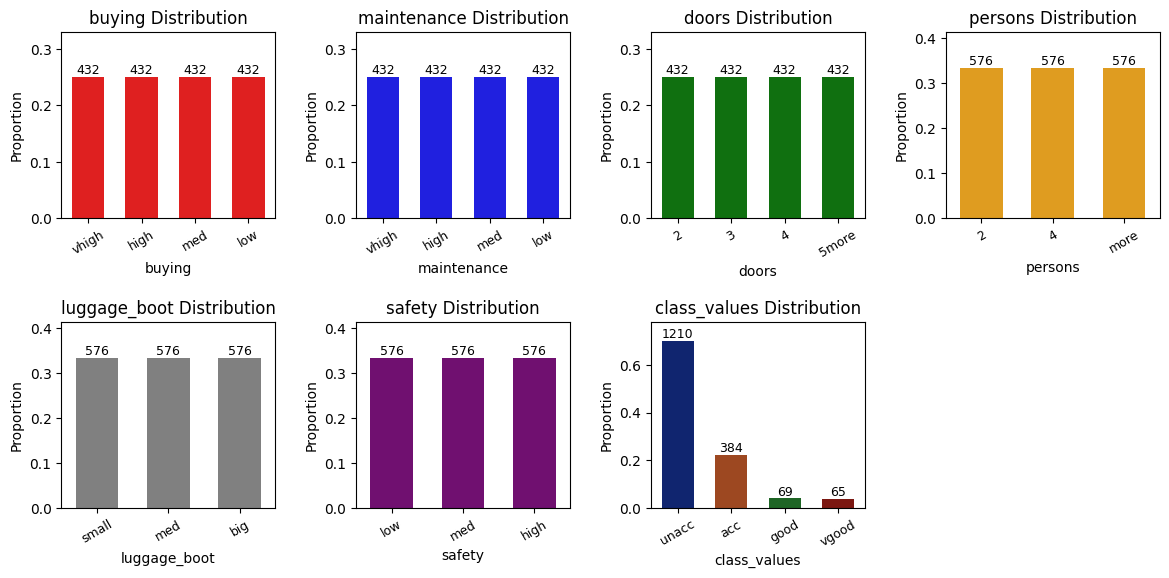

In [5]:
# Values distribution graph

colors_array = [
    "red", "blue", "green", "orange", "grey", "purple"
]

categorical_columns = df.columns.tolist()
n_cols = 4
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 2 + 2))

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    value_counts = df[col].value_counts(normalize=True)
    counts = df[col].value_counts()
    
    color_choice = colors_array[i % len(colors_array)]

    sns.barplot(
        x = value_counts.index,
        y = value_counts.values,
        palette = "dark" if i == 6 else None,
        color = color_choice if i != 6 else None,
        hue = value_counts.index if i == 6 else None,
        dodge = False,
        legend = False,
        width = 0.6,
    )
    
    for j, count in enumerate(counts):
        plt.text(j, value_counts.values[j], f'{count}', ha='center', va='bottom', fontsize=9)

    max_y = value_counts.max()
    plt.ylim(0, max_y + 0.08)
    
    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Proportion', fontsize=10)
    plt.xticks(rotation=30, fontsize=9)

plt.tight_layout(pad=1.5)
output = "values distribution graph"
plt.savefig(graph_directory + output)
plt.show()

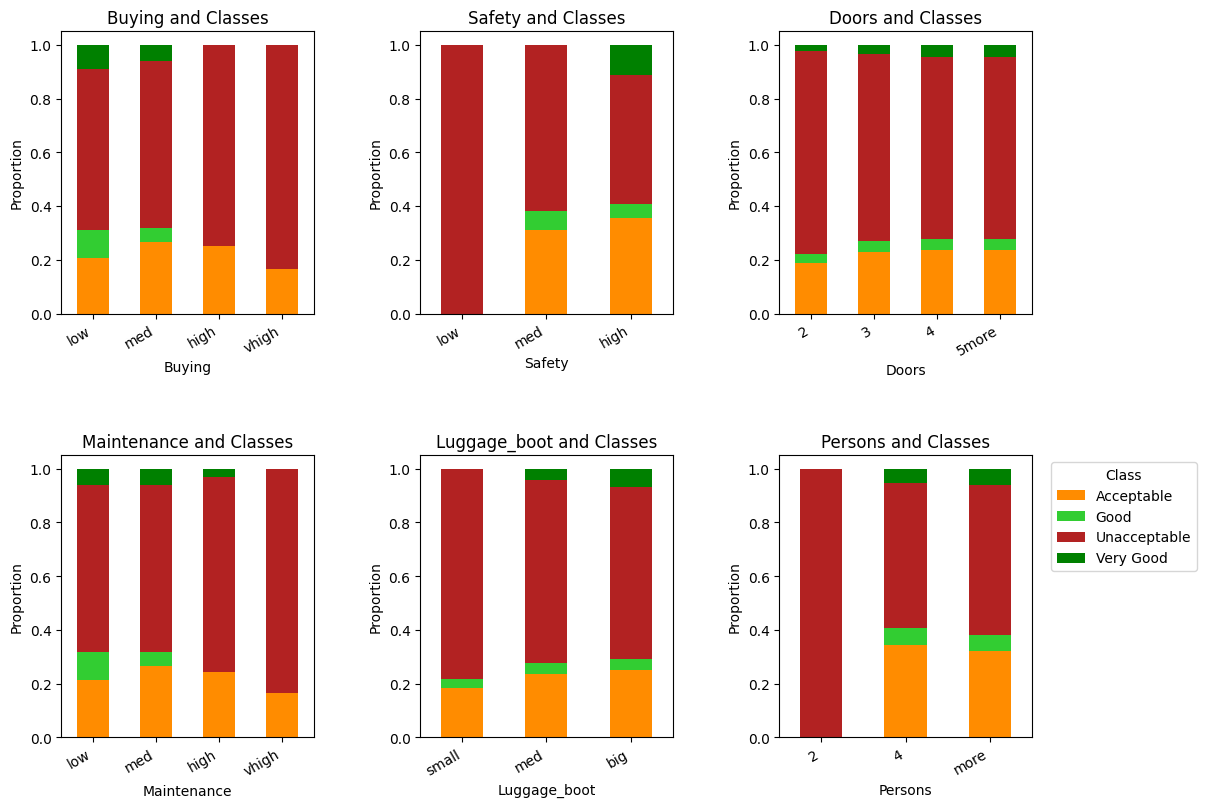

In [13]:
# Classes distribution on attribute values
class_colors = ['darkorange', 'limegreen', 'firebrick', 'green']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 9), constrained_layout=False)

axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    ordered_feature = pd.Categorical(
        df[feature], categories=value_order[feature], ordered=True
    )
    
    crosstab_data = pd.crosstab(ordered_feature, df['class_values'], normalize='index')
    
    crosstab_data.plot(
        kind = "bar", 
        stacked = True, 
        ax = ax, 
        color = class_colors,
        legend = False
    )
    ax.set_title(f'{feature.capitalize()} and Classes')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Proportion')
    
    ax.tick_params(axis='x', rotation=30)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

axes[-1].legend(
    title = "Class",
    labels = ["Acceptable", "Good", "Unacceptable", "Very Good"],
    bbox_to_anchor = (1.05, 1), 
    loc = 'upper left'
)

plt.tight_layout(pad=4)
output = "classes distribution graph"
plt.savefig(graph_directory + output)
plt.show()

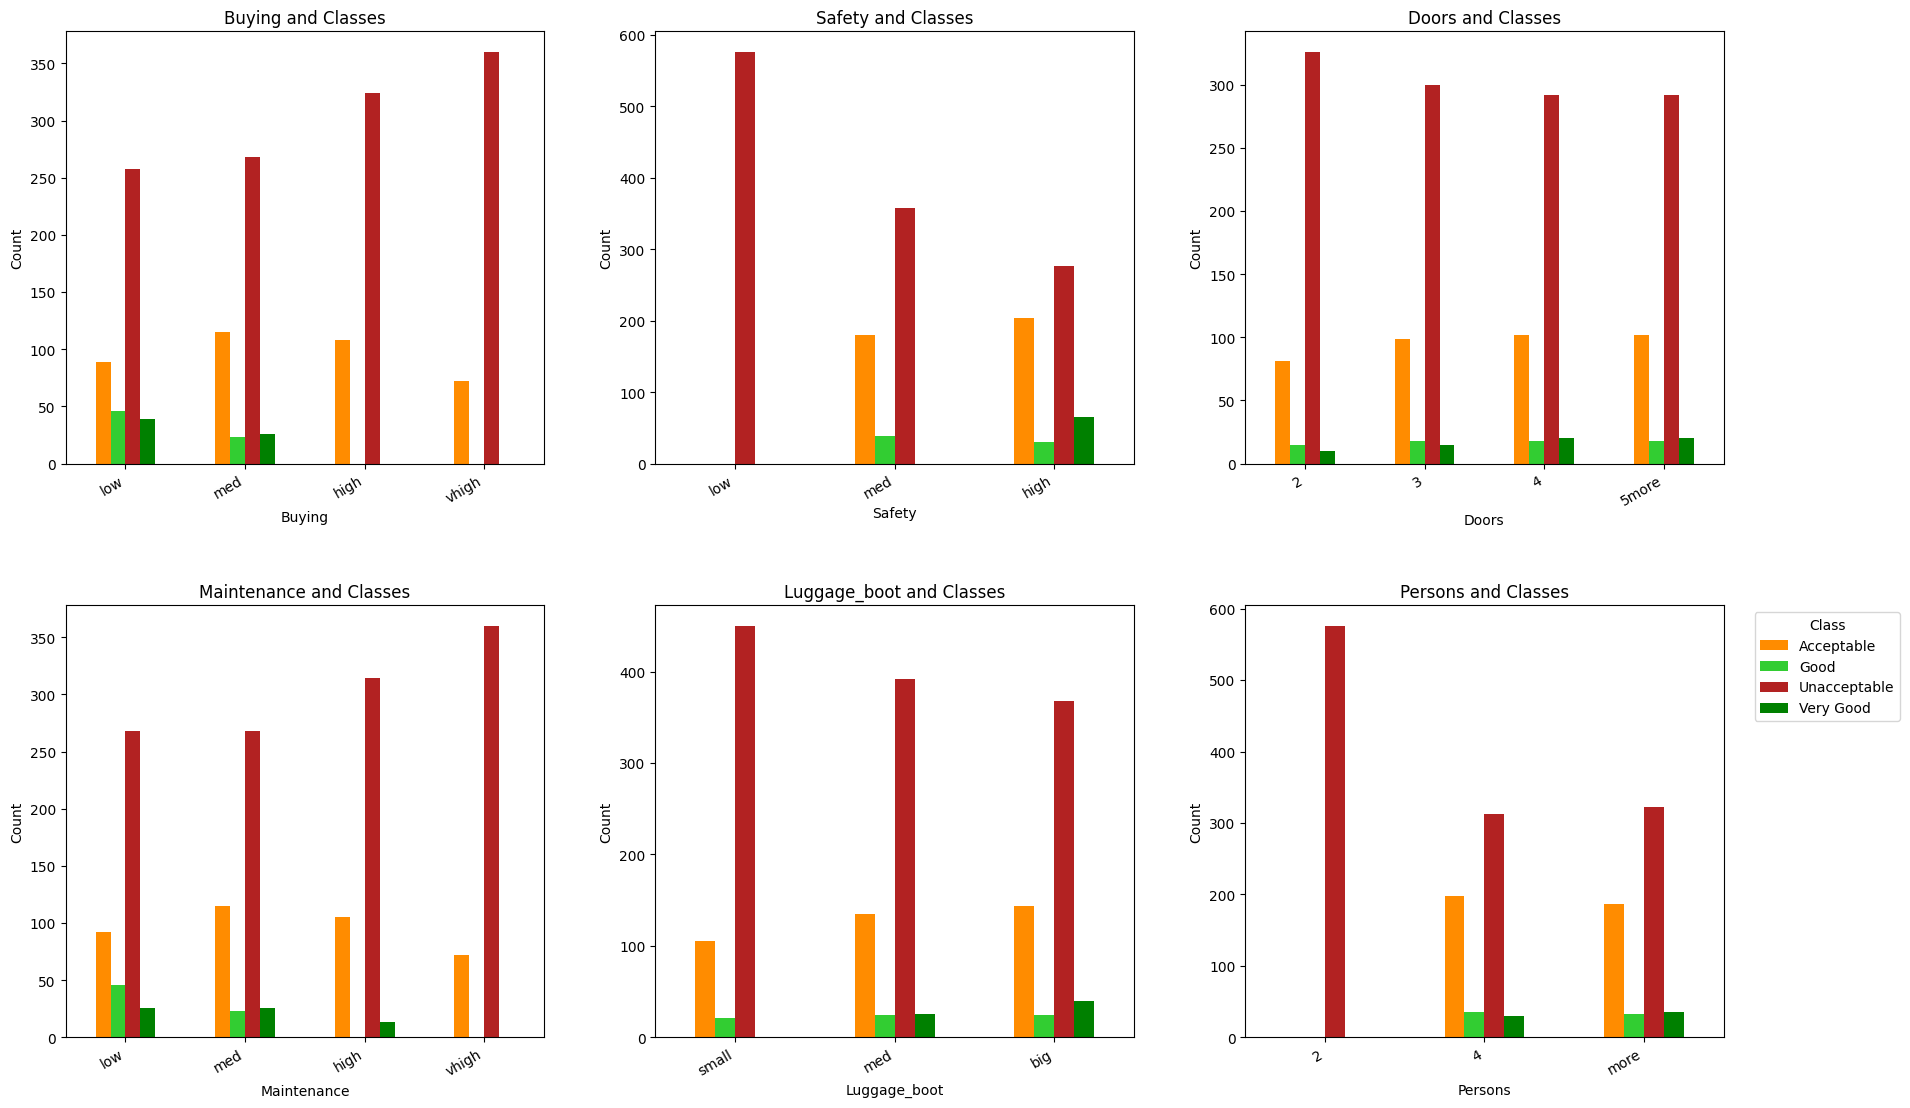

In [14]:

class_colors = ['darkorange', 'limegreen', 'firebrick', 'green']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), constrained_layout=False)

axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    ordered_feature = pd.Categorical(
        df[feature], categories=value_order[feature], ordered=True
    )
    
    # Crosstab without normalization
    crosstab_data = pd.crosstab(ordered_feature, df['class_values'])
    
    # Use grouped bar plot
    crosstab_data.plot(
        kind="bar", 
        stacked=False, 
        ax=ax, 
        color=class_colors,
        legend=False
    )
    ax.set_title(f'{feature.capitalize()} and Classes')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Count')  # Updated label to reflect count
    
    ax.tick_params(axis='x', rotation=30)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

# Add legend to the last subplot
axes[-1].legend(
    title="Class",
    labels=["Acceptable", "Good", "Unacceptable", "Very Good"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.tight_layout(pad=4)
output = "classes distribution by count"
plt.savefig(graph_directory + output)
plt.show()
